<a href="https://colab.research.google.com/github/raulbenitez/DEEPCARDIO/blob/master/sparks/train/inception_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive") # , force_remount=True)

Mounted at /content/drive


In [4]:
import keras
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import sys
import cv2
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

# Insert the directory
sys.path.insert(0, 'drive/MyDrive/tfm/DEEPCARDIO_drive/sparks')

from train.inception import load_data

In [5]:
os.listdir(sys.path[0])

['deepcardio_utils.py', 'train', '__pycache__']

In [6]:
# ../../_datasets/deepcardio/170215_RyR-GFP30_RO_01_Serie2_SPARKS-calcium
X_train, Y_train, X_test, Y_test = load_data(classesFromFile=True, imageFolder='drive/MyDrive/tfm/DEEPCARDIO_drive/_datasets/deepcardio/170215_RyR-GFP30_RO_01_Serie2_SPARKS-calcium')
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.2, random_state=1)

Prop of sparks in train dataset: 14.92, and in validation dataset: 14.6


In [7]:
def load_and_evaluate_model(trainID):
  inceptionv3 = keras.applications.InceptionV3(include_top=True, weights=None, classes=2, input_shape=X_train[0].shape)
  inceptionv3.load_weights(f"drive/MyDrive/tfm/DEEPCARDIO_drive/sparks/train/{trainID}.h5")

  class_labels = ['no-spark', 'spark']

  Y_test_pred = inceptionv3.predict(X_test)
  Y_valid_pred = inceptionv3.predict(X_valid)

  confMatrix = confusion_matrix(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), normalize='true')
  plt.figure(figsize=(10,8))
  sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
  plt.title('confusion matrix validation')
  plt.xlabel('predicted')
  plt.ylabel('true')
  plt.show()
  print("Classification report validation:\n",  classification_report(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), target_names=class_labels))

  confMatrix = confusion_matrix(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), normalize='true')
  plt.figure(figsize=(10,8))
  sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
  plt.title('confusion matrix test')
  plt.xlabel('predicted')
  plt.ylabel('true')
  plt.show()
  print("Classification report test:\n",  classification_report(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), target_names=class_labels))
  return Y_test_pred, Y_valid_pred

## inceptionv3_200epochs.h5

In [ ]:
inceptionv3 = keras.applications.InceptionV3(include_top=True, weights=None, classes=2, input_shape=X_train[0].shape)
inceptionv3.load_weights("inceptionv3_200epochs.h5")

class_labels = ['no-spark', 'spark']

OSError: ignored

In [ ]:
Y_test_pred = inceptionv3.predict(X_test)
Y_valid_pred = inceptionv3.predict(X_valid)

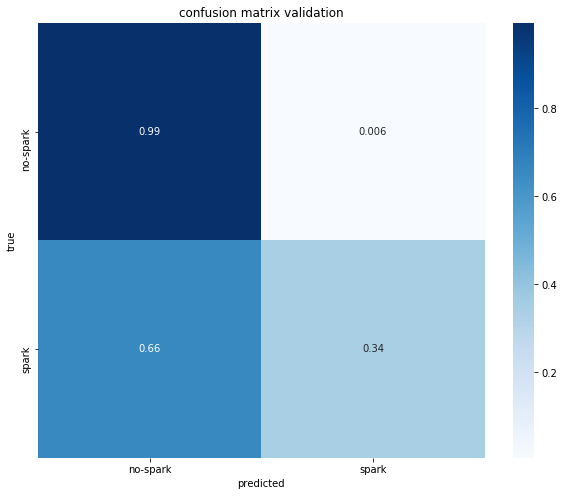

Classification report validation:
               precision    recall  f1-score   support

    no-spark       0.89      0.99      0.94       334
       spark       0.91      0.34      0.50        61

    accuracy                           0.89       395
   macro avg       0.90      0.67      0.72       395
weighted avg       0.90      0.89      0.87       395



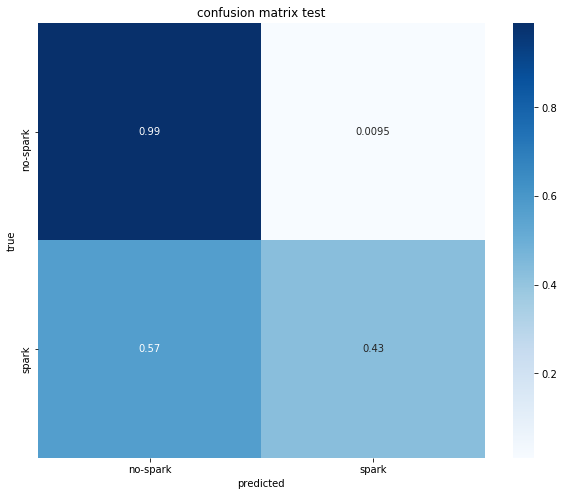

Classification report test:
               precision    recall  f1-score   support

    no-spark       0.91      0.99      0.95       421
       spark       0.89      0.43      0.58        72

    accuracy                           0.91       493
   macro avg       0.90      0.71      0.76       493
weighted avg       0.91      0.91      0.89       493



In [ ]:
confMatrix = confusion_matrix(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('confusion matrix validation')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print("Classification report validation:\n",  classification_report(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), target_names=class_labels))

confMatrix = confusion_matrix(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('confusion matrix test')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print("Classification report test:\n",  classification_report(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), target_names=class_labels))

## inceptionv3_ep200_batch32_metric_accuracy.h5

In [ ]:
inceptionv3 = keras.applications.InceptionV3(include_top=True, weights=None, classes=2, input_shape=X_train[0].shape)
inceptionv3.load_weights("inceptionv3_ep200_batch32_metric_accuracy.h5")

class_labels = ['no-spark', 'spark']

In [ ]:
Y_test_pred = inceptionv3.predict(X_test)
Y_valid_pred = inceptionv3.predict(X_valid)

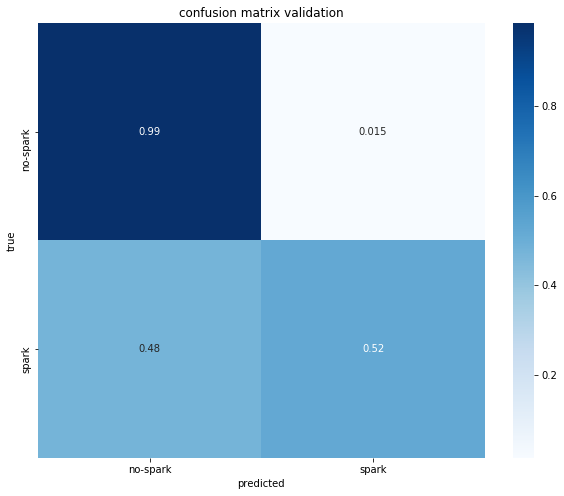

Classification report validation:
               precision    recall  f1-score   support

    no-spark       0.92      0.99      0.95       334
       spark       0.86      0.52      0.65        61

    accuracy                           0.91       395
   macro avg       0.89      0.75      0.80       395
weighted avg       0.91      0.91      0.90       395



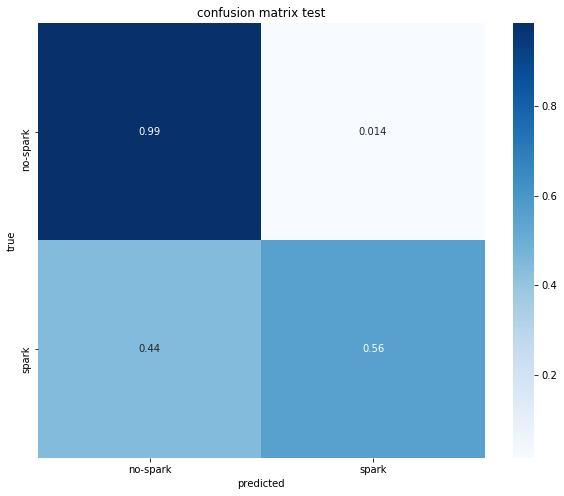

Classification report test:
               precision    recall  f1-score   support

    no-spark       0.93      0.99      0.96       421
       spark       0.87      0.56      0.68        72

    accuracy                           0.92       493
   macro avg       0.90      0.77      0.82       493
weighted avg       0.92      0.92      0.92       493



In [ ]:
confMatrix = confusion_matrix(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('confusion matrix validation')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print("Classification report validation:\n",  classification_report(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), target_names=class_labels))

confMatrix = confusion_matrix(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('confusion matrix test')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print("Classification report test:\n",  classification_report(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), target_names=class_labels))

## inceptionv3_ep200_batch32_justMetricSparkRecall.h5

In [ ]:
inceptionv3 = keras.applications.InceptionV3(include_top=True, weights=None, classes=2, input_shape=X_train[0].shape)
inceptionv3.load_weights("inceptionv3_ep200_batch32_justMetricSparkRecall.h5")

class_labels = ['no-spark', 'spark']

In [ ]:
Y_test_pred = inceptionv3.predict(X_test)
Y_valid_pred = inceptionv3.predict(X_valid)

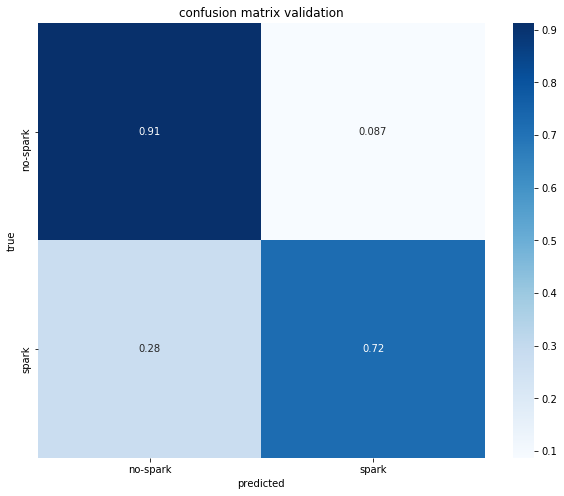

Classification report validation:
               precision    recall  f1-score   support

    no-spark       0.95      0.91      0.93       334
       spark       0.60      0.72      0.66        61

    accuracy                           0.88       395
   macro avg       0.77      0.82      0.79       395
weighted avg       0.89      0.88      0.89       395



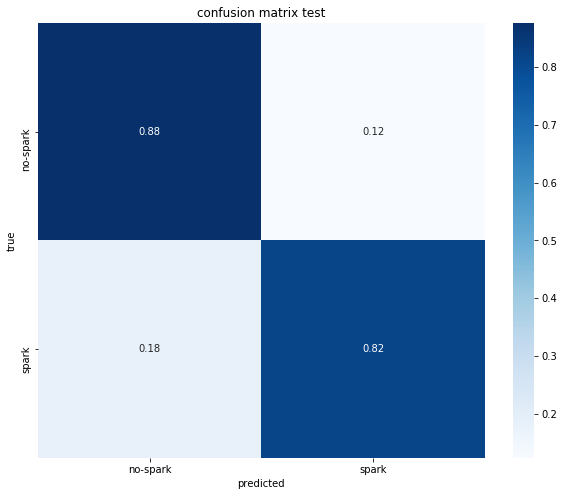

Classification report test:
               precision    recall  f1-score   support

    no-spark       0.97      0.88      0.92       421
       spark       0.53      0.82      0.64        72

    accuracy                           0.87       493
   macro avg       0.75      0.85      0.78       493
weighted avg       0.90      0.87      0.88       493



In [ ]:
confMatrix = confusion_matrix(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('confusion matrix validation')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print("Classification report validation:\n",  classification_report(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), target_names=class_labels))

confMatrix = confusion_matrix(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('confusion matrix test')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print("Classification report test:\n",  classification_report(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), target_names=class_labels))

## inceptionv3_ep200_batch32_justMetricSparkRecall2.h5
Only recall even if ther is none (nan).

In [ ]:
inceptionv3 = keras.applications.InceptionV3(include_top=True, weights=None, classes=2, input_shape=X_train[0].shape)
inceptionv3.load_weights("inceptionv3_ep200_batch32_justMetricSparkRecall2.h5")

class_labels = ['no-spark', 'spark']

In [ ]:
Y_test_pred = inceptionv3.predict(X_test)
Y_valid_pred = inceptionv3.predict(X_valid)

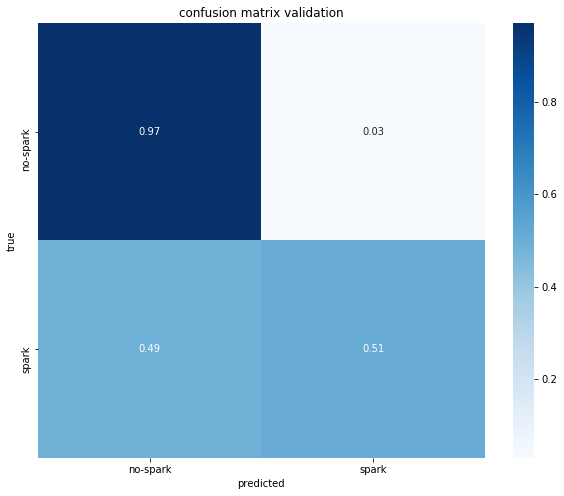

Classification report validation:
               precision    recall  f1-score   support

    no-spark       0.92      0.97      0.94       334
       spark       0.76      0.51      0.61        61

    accuracy                           0.90       395
   macro avg       0.84      0.74      0.77       395
weighted avg       0.89      0.90      0.89       395



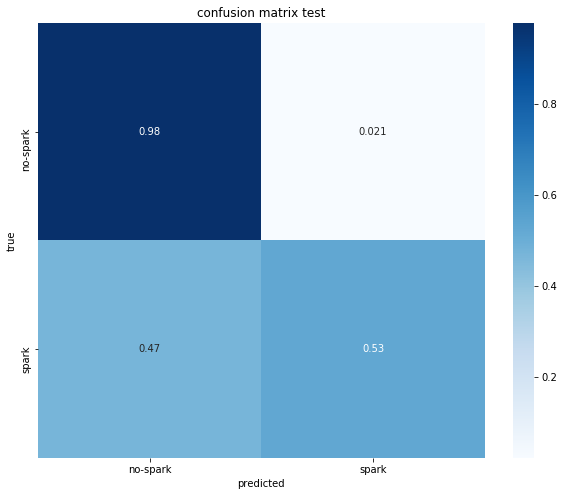

Classification report test:
               precision    recall  f1-score   support

    no-spark       0.92      0.98      0.95       421
       spark       0.81      0.53      0.64        72

    accuracy                           0.91       493
   macro avg       0.87      0.75      0.79       493
weighted avg       0.91      0.91      0.90       493



In [ ]:
confMatrix = confusion_matrix(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('confusion matrix validation')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print("Classification report validation:\n",  classification_report(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), target_names=class_labels))

confMatrix = confusion_matrix(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('confusion matrix test')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print("Classification report test:\n",  classification_report(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), target_names=class_labels))

## inceptionv3_ep200_batch32_08metricSparkRecall02accuracy.h5
if spark -> 0.8*recall + 0.2 accuracy else accuracy

In [ ]:
inceptionv3 = keras.applications.InceptionV3(include_top=True, weights=None, classes=2, input_shape=X_train[0].shape)
inceptionv3.load_weights("inceptionv3_ep200_batch32_08metricSparkRecall02accuracy.h5")

class_labels = ['no-spark', 'spark']

In [ ]:
Y_test_pred = inceptionv3.predict(X_test)
Y_valid_pred = inceptionv3.predict(X_valid)

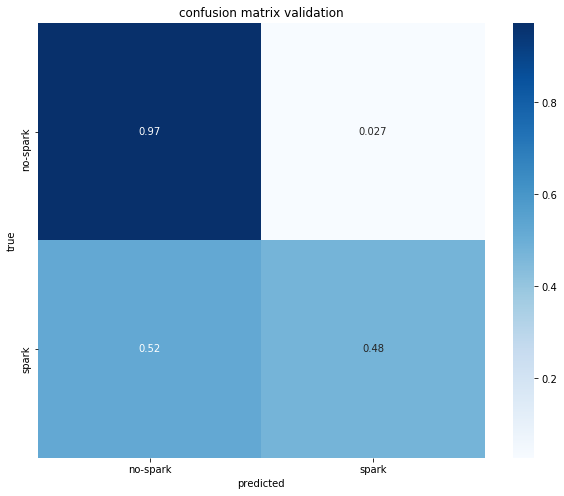

Classification report validation:
               precision    recall  f1-score   support

    no-spark       0.91      0.97      0.94       334
       spark       0.76      0.48      0.59        61

    accuracy                           0.90       395
   macro avg       0.84      0.72      0.76       395
weighted avg       0.89      0.90      0.89       395



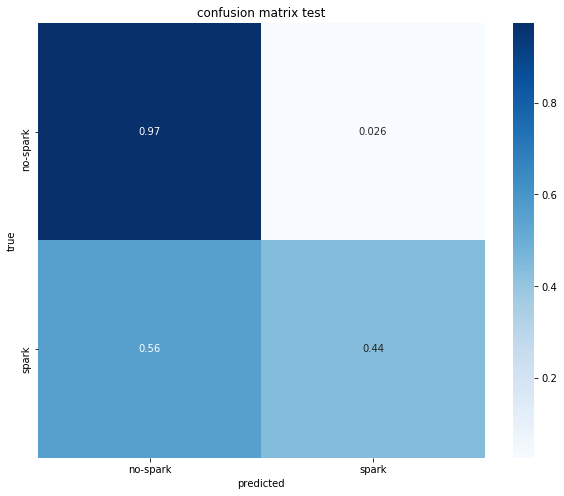

Classification report test:
               precision    recall  f1-score   support

    no-spark       0.91      0.97      0.94       421
       spark       0.74      0.44      0.56        72

    accuracy                           0.90       493
   macro avg       0.83      0.71      0.75       493
weighted avg       0.89      0.90      0.89       493



In [ ]:
confMatrix = confusion_matrix(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('confusion matrix validation')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print("Classification report validation:\n",  classification_report(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), target_names=class_labels))

confMatrix = confusion_matrix(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('confusion matrix test')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print("Classification report test:\n",  classification_report(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), target_names=class_labels))

## inceptionv3_ep200_batch32_metric_sparkRecall_ifExistsElse_accuracy.h5

In [ ]:
inceptionv3 = keras.applications.InceptionV3(include_top=True, weights=None, classes=2, input_shape=X_train[0].shape)
inceptionv3.load_weights("inceptionv3_ep200_batch32_metric_sparkRecall_ifExistsElse_accuracy.h5")

class_labels = ['no-spark', 'spark']

In [ ]:
Y_test_pred = inceptionv3.predict(X_test)
Y_valid_pred = inceptionv3.predict(X_valid)

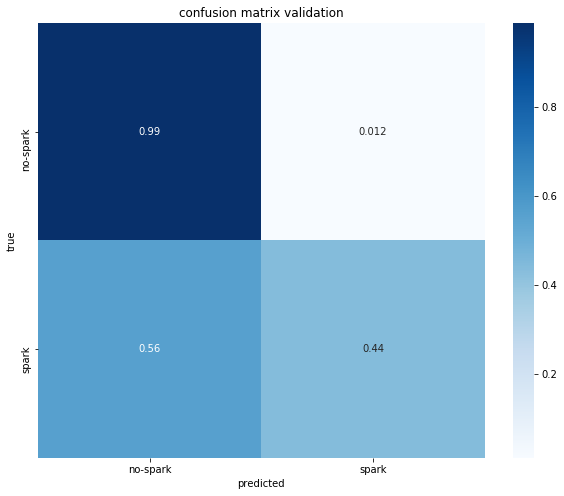

Classification report validation:
               precision    recall  f1-score   support

    no-spark       0.91      0.99      0.95       334
       spark       0.87      0.44      0.59        61

    accuracy                           0.90       395
   macro avg       0.89      0.72      0.77       395
weighted avg       0.90      0.90      0.89       395



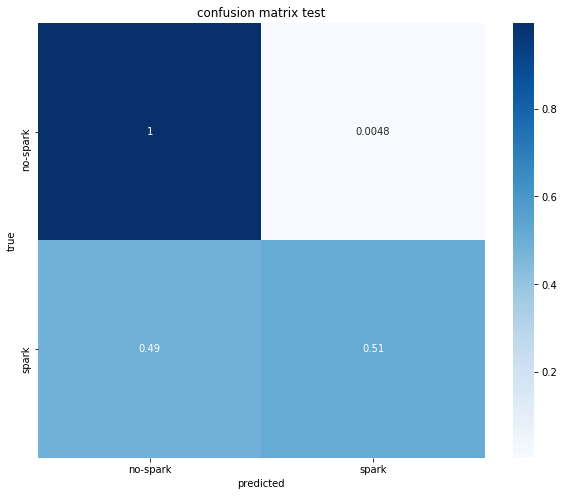

Classification report test:
               precision    recall  f1-score   support

    no-spark       0.92      1.00      0.96       421
       spark       0.95      0.51      0.67        72

    accuracy                           0.92       493
   macro avg       0.94      0.75      0.81       493
weighted avg       0.93      0.92      0.92       493



In [ ]:
confMatrix = confusion_matrix(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('confusion matrix validation')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print("Classification report validation:\n",  classification_report(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), target_names=class_labels))

confMatrix = confusion_matrix(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('confusion matrix test')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print("Classification report test:\n",  classification_report(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), target_names=class_labels))

### Comentaris
Quan no "hi ha spark" en el dataset, és més fàcil aconseguir una mètrica més alta (accuracy).

## inceptionv3_ep200_batch32_metric_09sparkRecall01wrongSparkSigmoid.h5

In [ ]:
inceptionv3 = keras.applications.InceptionV3(include_top=True, weights=None, classes=2, input_shape=X_train[0].shape)
inceptionv3.load_weights("inceptionv3_ep200_batch32_metric_09sparkRecall01wrongSparkSigmoid.h5")

class_labels = ['no-spark', 'spark']

In [ ]:
Y_test_pred = inceptionv3.predict(X_test)
Y_valid_pred = inceptionv3.predict(X_valid)

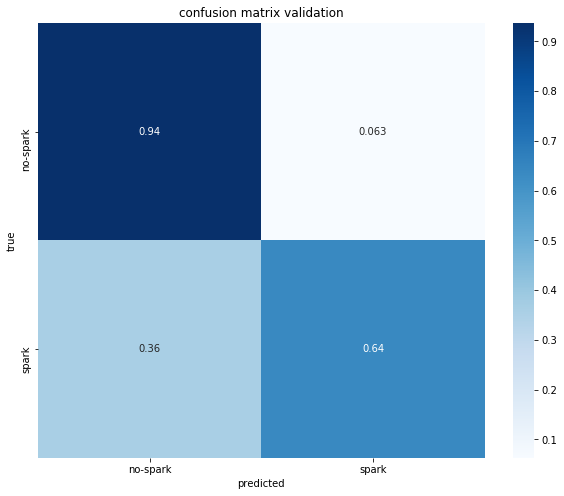

Classification report validation:
               precision    recall  f1-score   support

    no-spark       0.93      0.94      0.94       334
       spark       0.65      0.64      0.64        61

    accuracy                           0.89       395
   macro avg       0.79      0.79      0.79       395
weighted avg       0.89      0.89      0.89       395



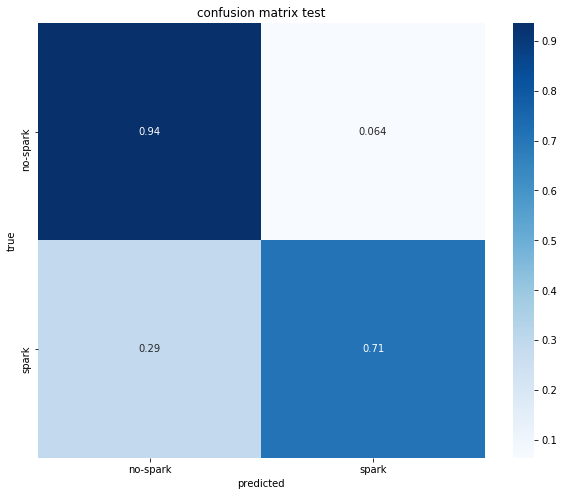

Classification report test:
               precision    recall  f1-score   support

    no-spark       0.95      0.94      0.94       421
       spark       0.65      0.71      0.68        72

    accuracy                           0.90       493
   macro avg       0.80      0.82      0.81       493
weighted avg       0.91      0.90      0.90       493



In [ ]:
confMatrix = confusion_matrix(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('confusion matrix validation')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print("Classification report validation:\n",  classification_report(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), target_names=class_labels))

confMatrix = confusion_matrix(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('confusion matrix test')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print("Classification report test:\n",  classification_report(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), target_names=class_labels))

## inceptionv3_ep200_batch64_metric_09recall_01sigmoid.h5

In [ ]:
inceptionv3 = keras.applications.InceptionV3(include_top=True, weights=None, classes=2, input_shape=X_train[0].shape)
inceptionv3.load_weights("drive/MyDrive/tfm/DEEPCARDIO_drive/sparks/train/inceptionv3_ep200_batch64_metric_09recall_01sigmoid.h5")

class_labels = ['no-spark', 'spark']

In [ ]:
Y_test_pred = inceptionv3.predict(X_test)
Y_valid_pred = inceptionv3.predict(X_valid)

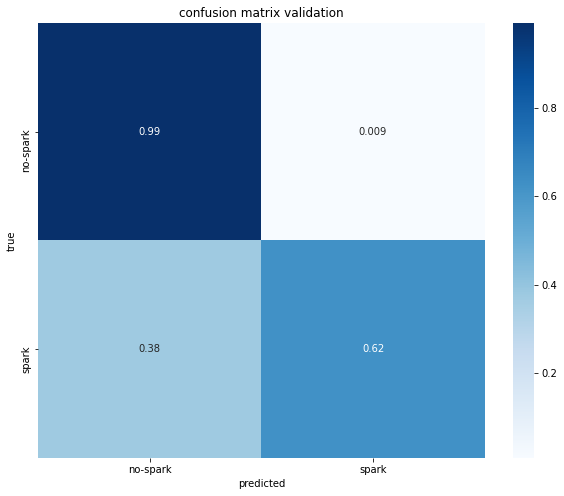

Classification report validation:
               precision    recall  f1-score   support

    no-spark       0.94      0.99      0.96       334
       spark       0.93      0.62      0.75        61

    accuracy                           0.93       395
   macro avg       0.93      0.81      0.85       395
weighted avg       0.93      0.93      0.93       395



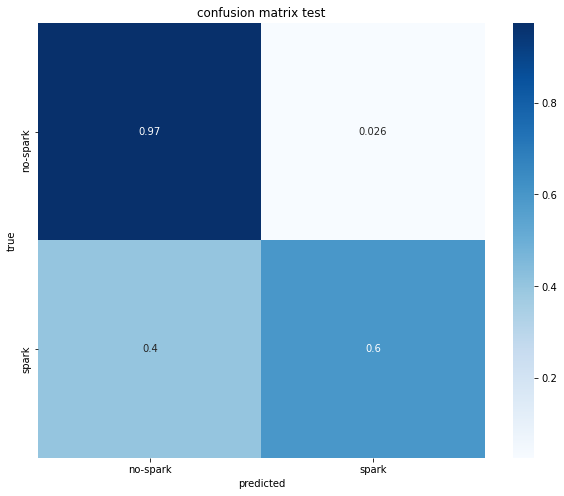

Classification report test:
               precision    recall  f1-score   support

    no-spark       0.93      0.97      0.95       421
       spark       0.80      0.60      0.68        72

    accuracy                           0.92       493
   macro avg       0.87      0.79      0.82       493
weighted avg       0.91      0.92      0.91       493



In [ ]:
confMatrix = confusion_matrix(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('confusion matrix validation')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print("Classification report validation:\n",  classification_report(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), target_names=class_labels))

confMatrix = confusion_matrix(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('confusion matrix test')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print("Classification report test:\n",  classification_report(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), target_names=class_labels))

## inceptionv3_ep200_batch128_metric_09recall_01sigmoid.h5

In [ ]:
inceptionv3 = keras.applications.InceptionV3(include_top=True, weights=None, classes=2, input_shape=X_train[0].shape)
inceptionv3.load_weights("drive/MyDrive/tfm/DEEPCARDIO_drive/sparks/train/inceptionv3_ep200_batch128_metric_09recall_01sigmoid.h5")

class_labels = ['no-spark', 'spark']

In [ ]:
Y_test_pred = inceptionv3.predict(X_test)
Y_valid_pred = inceptionv3.predict(X_valid)

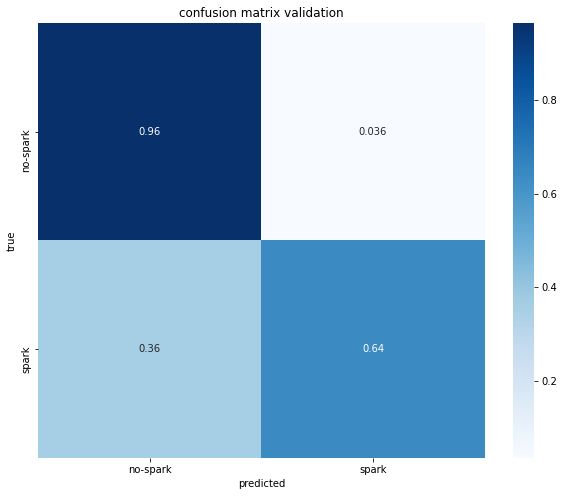

Classification report validation:
               precision    recall  f1-score   support

    no-spark       0.94      0.96      0.95       334
       spark       0.76      0.64      0.70        61

    accuracy                           0.91       395
   macro avg       0.85      0.80      0.82       395
weighted avg       0.91      0.91      0.91       395



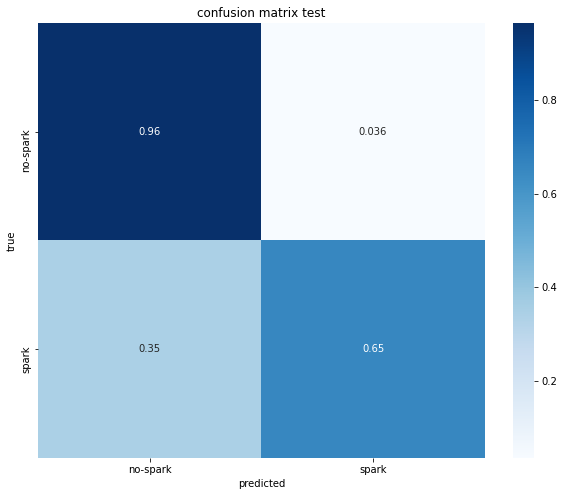

Classification report test:
               precision    recall  f1-score   support

    no-spark       0.94      0.96      0.95       421
       spark       0.76      0.65      0.70        72

    accuracy                           0.92       493
   macro avg       0.85      0.81      0.83       493
weighted avg       0.92      0.92      0.92       493



In [ ]:
confMatrix = confusion_matrix(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('confusion matrix validation')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print("Classification report validation:\n",  classification_report(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), target_names=class_labels))

confMatrix = confusion_matrix(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('confusion matrix test')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print("Classification report test:\n",  classification_report(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), target_names=class_labels))

## inceptionv3_ep200_batch256_metric_09recall_01sigmoid.h5

In [ ]:
inceptionv3 = keras.applications.InceptionV3(include_top=True, weights=None, classes=2, input_shape=X_train[0].shape)
inceptionv3.load_weights("drive/MyDrive/tfm/DEEPCARDIO_drive/sparks/train/inceptionv3_ep200_batch256_metric_09recall_01sigmoid.h5")

class_labels = ['no-spark', 'spark']

In [ ]:
Y_test_pred = inceptionv3.predict(X_test)
Y_valid_pred = inceptionv3.predict(X_valid)

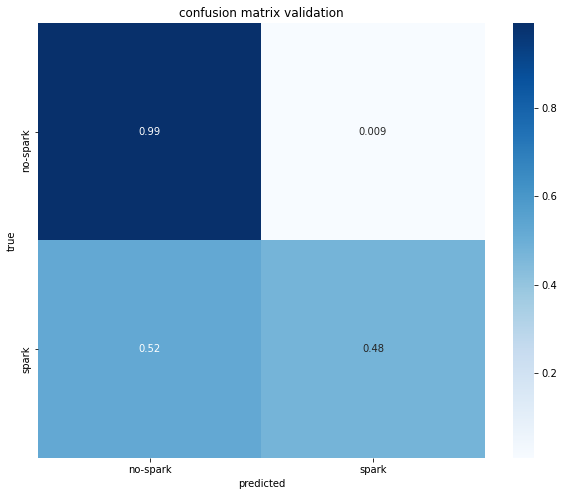

Classification report validation:
               precision    recall  f1-score   support

    no-spark       0.91      0.99      0.95       334
       spark       0.91      0.48      0.62        61

    accuracy                           0.91       395
   macro avg       0.91      0.73      0.79       395
weighted avg       0.91      0.91      0.90       395



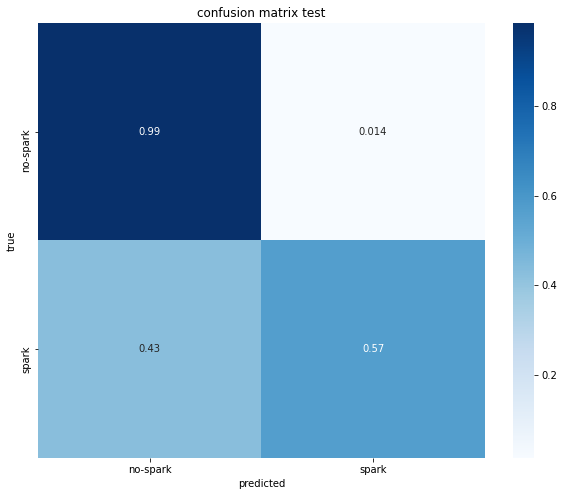

Classification report test:
               precision    recall  f1-score   support

    no-spark       0.93      0.99      0.96       421
       spark       0.87      0.57      0.69        72

    accuracy                           0.92       493
   macro avg       0.90      0.78      0.82       493
weighted avg       0.92      0.92      0.92       493



In [ ]:
confMatrix = confusion_matrix(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('confusion matrix validation')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print("Classification report validation:\n",  classification_report(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), target_names=class_labels))

confMatrix = confusion_matrix(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('confusion matrix test')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print("Classification report test:\n",  classification_report(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), target_names=class_labels))

## inceptionv3_ep5_batch256_metric_09recall_01sigmoid_loss_custom.h5

In [ ]:
inceptionv3 = keras.applications.InceptionV3(include_top=True, weights=None, classes=2, input_shape=X_train[0].shape)
inceptionv3.load_weights("drive/MyDrive/tfm/DEEPCARDIO_drive/sparks/train/inceptionv3_ep5_batch256_metric_09recall_01sigmoid_loss_custom.h5")

class_labels = ['no-spark', 'spark']

Y_test_pred = inceptionv3.predict(X_test)
Y_valid_pred = inceptionv3.predict(X_valid)

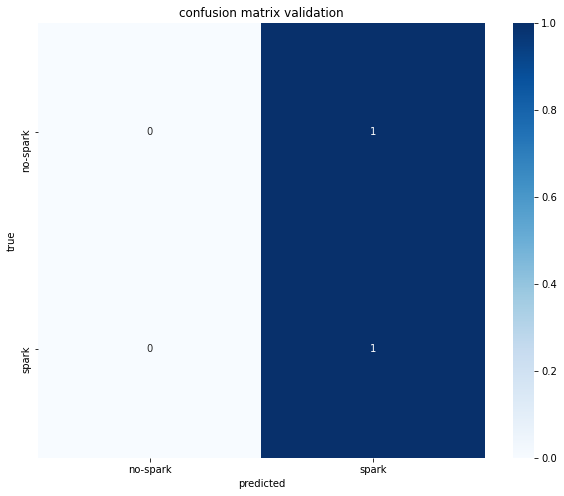

Classification report validation:
               precision    recall  f1-score   support

    no-spark       0.00      0.00      0.00       334
       spark       0.15      1.00      0.27        61

    accuracy                           0.15       395
   macro avg       0.08      0.50      0.13       395
weighted avg       0.02      0.15      0.04       395



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


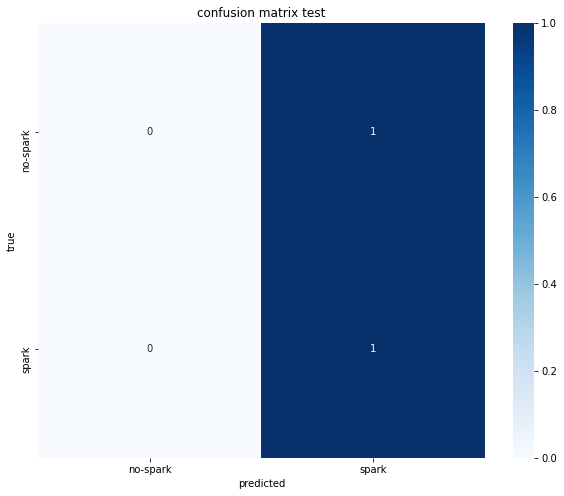

Classification report test:
               precision    recall  f1-score   support

    no-spark       0.00      0.00      0.00       421
       spark       0.15      1.00      0.25        72

    accuracy                           0.15       493
   macro avg       0.07      0.50      0.13       493
weighted avg       0.02      0.15      0.04       493



In [ ]:
confMatrix = confusion_matrix(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('confusion matrix validation')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print("Classification report validation:\n",  classification_report(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), target_names=class_labels))

confMatrix = confusion_matrix(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('confusion matrix test')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print("Classification report test:\n",  classification_report(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), target_names=class_labels))

## inceptionv3_ep200_batch256_metric_09recall_01sigmoid_loss_tmpcustom.h5

In [ ]:
inceptionv3 = keras.applications.InceptionV3(include_top=True, weights=None, classes=2, input_shape=X_train[0].shape)
inceptionv3.load_weights("drive/MyDrive/tfm/DEEPCARDIO_drive/sparks/train/inceptionv3_ep200_batch256_metric_09recall_01sigmoid_loss_tmpcustom.h5")

class_labels = ['no-spark', 'spark']

Y_test_pred = inceptionv3.predict(X_test)
Y_valid_pred = inceptionv3.predict(X_valid)

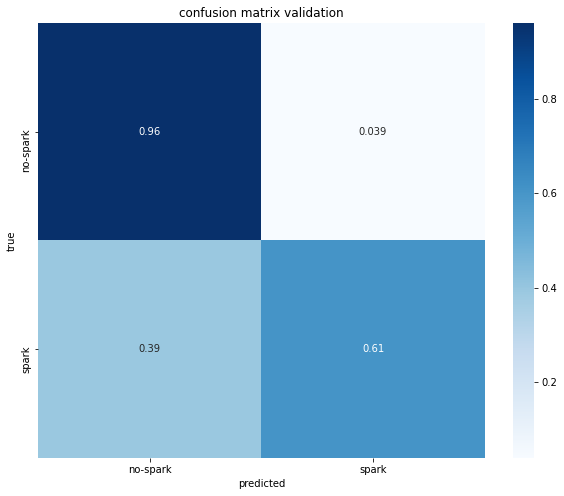

Classification report validation:
               precision    recall  f1-score   support

    no-spark       0.93      0.96      0.95       334
       spark       0.74      0.61      0.67        61

    accuracy                           0.91       395
   macro avg       0.84      0.78      0.81       395
weighted avg       0.90      0.91      0.90       395



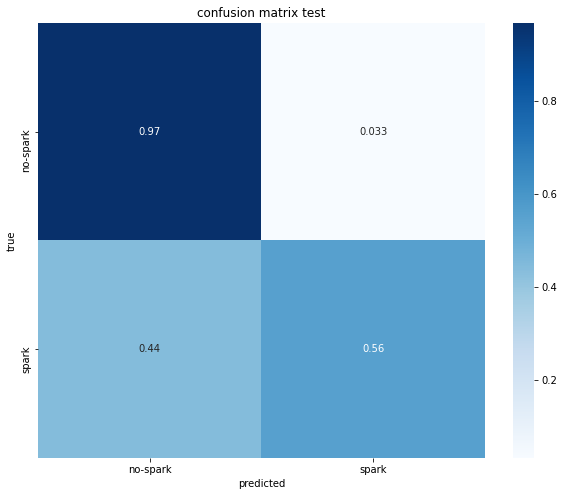

Classification report test:
               precision    recall  f1-score   support

    no-spark       0.93      0.97      0.95       421
       spark       0.74      0.56      0.63        72

    accuracy                           0.91       493
   macro avg       0.83      0.76      0.79       493
weighted avg       0.90      0.91      0.90       493



In [ ]:
confMatrix = confusion_matrix(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('confusion matrix validation')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print("Classification report validation:\n",  classification_report(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), target_names=class_labels))

confMatrix = confusion_matrix(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('confusion matrix test')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print("Classification report test:\n",  classification_report(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), target_names=class_labels))

## inceptionv3_ep300_batch256_metric_09recall_01sigmoid_loss_tmpcustom2.h5

In [ ]:
inceptionv3 = keras.applications.InceptionV3(include_top=True, weights=None, classes=2, input_shape=X_train[0].shape)
inceptionv3.load_weights("drive/MyDrive/tfm/DEEPCARDIO_drive/sparks/train/inceptionv3_ep300_batch256_metric_09recall_01sigmoid_loss_tmpcustom2.h5")

class_labels = ['no-spark', 'spark']

Y_test_pred = inceptionv3.predict(X_test)
Y_valid_pred = inceptionv3.predict(X_valid)

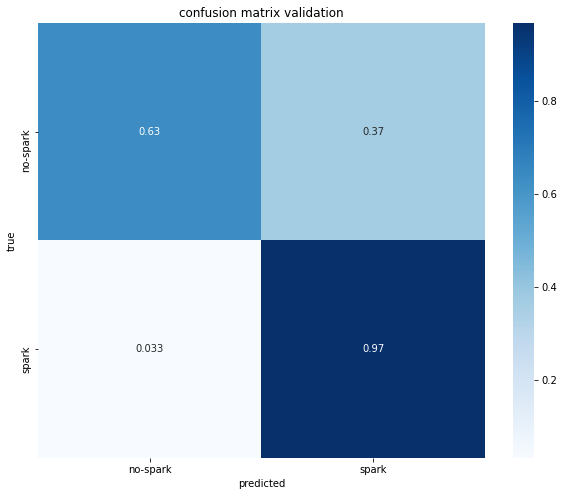

Classification report validation:
               precision    recall  f1-score   support

    no-spark       0.99      0.63      0.77       334
       spark       0.32      0.97      0.49        61

    accuracy                           0.68       395
   macro avg       0.66      0.80      0.63       395
weighted avg       0.89      0.68      0.73       395



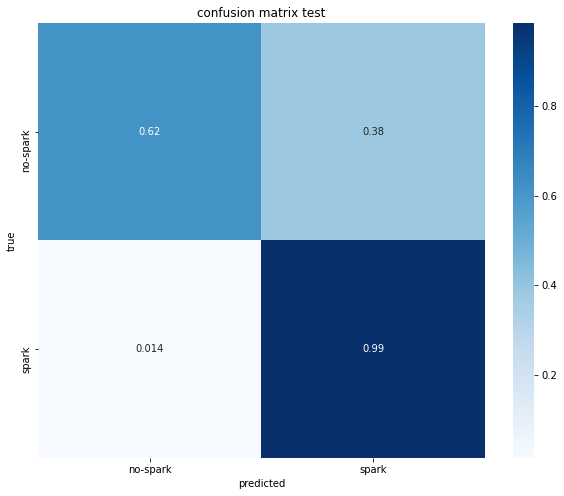

Classification report test:
               precision    recall  f1-score   support

    no-spark       1.00      0.62      0.76       421
       spark       0.31      0.99      0.47        72

    accuracy                           0.67       493
   macro avg       0.65      0.80      0.61       493
weighted avg       0.90      0.67      0.72       493



In [ ]:
confMatrix = confusion_matrix(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('confusion matrix validation')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print("Classification report validation:\n",  classification_report(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), target_names=class_labels))

confMatrix = confusion_matrix(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('confusion matrix test')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print("Classification report test:\n",  classification_report(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), target_names=class_labels))

## inceptionv3_ep300_batch256_metric_06recall_04sigmoid_loss_tmpcustom.h5

In [ ]:
inceptionv3 = keras.applications.InceptionV3(include_top=True, weights=None, classes=2, input_shape=X_train[0].shape)
inceptionv3.load_weights("drive/MyDrive/tfm/DEEPCARDIO_drive/sparks/train/inceptionv3_ep300_batch256_metric_06recall_04sigmoid_loss_tmpcustom.h5")

class_labels = ['no-spark', 'spark']

Y_test_pred = inceptionv3.predict(X_test)
Y_valid_pred = inceptionv3.predict(X_valid)

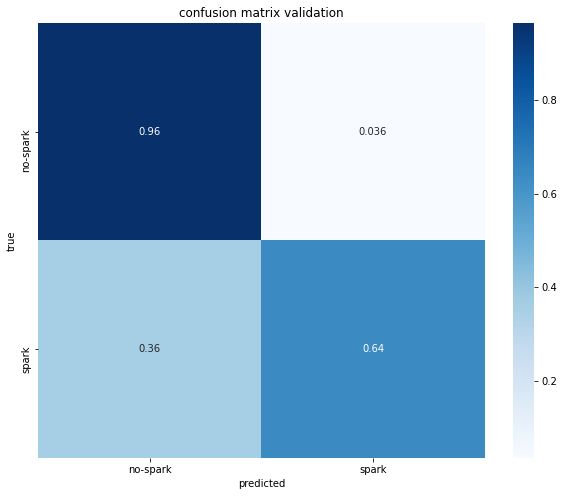

Classification report validation:
               precision    recall  f1-score   support

    no-spark       0.94      0.96      0.95       334
       spark       0.76      0.64      0.70        61

    accuracy                           0.91       395
   macro avg       0.85      0.80      0.82       395
weighted avg       0.91      0.91      0.91       395



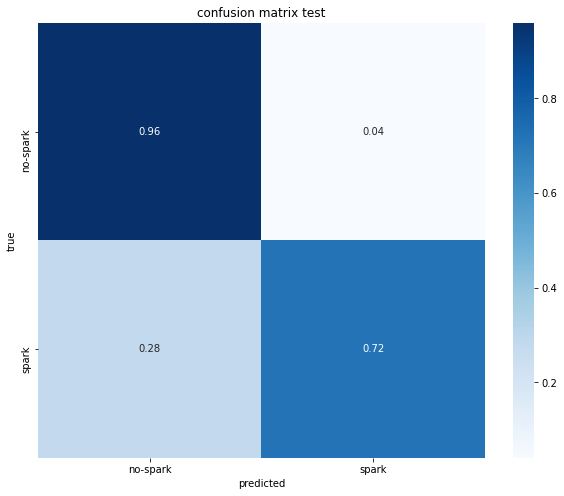

Classification report test:
               precision    recall  f1-score   support

    no-spark       0.95      0.96      0.96       421
       spark       0.75      0.72      0.74        72

    accuracy                           0.92       493
   macro avg       0.85      0.84      0.85       493
weighted avg       0.92      0.92      0.92       493



In [ ]:
confMatrix = confusion_matrix(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('confusion matrix validation')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print("Classification report validation:\n",  classification_report(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), target_names=class_labels))

confMatrix = confusion_matrix(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('confusion matrix test')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print("Classification report test:\n",  classification_report(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), target_names=class_labels))

## inceptionv3_ep300_batch256_metric_06recall04sigmoid_loss_sigmoid_gaussfilter2.h5

In [ ]:
inceptionv3 = keras.applications.InceptionV3(include_top=True, weights=None, classes=2, input_shape=X_train[0].shape)
inceptionv3.load_weights("drive/MyDrive/tfm/DEEPCARDIO_drive/sparks/train/inceptionv3_ep300_batch256_metric_06recall04sigmoid_loss_sigmoid_gaussfilter2.h5")

class_labels = ['no-spark', 'spark']

Y_test_pred = inceptionv3.predict(X_test)
Y_valid_pred = inceptionv3.predict(X_valid)

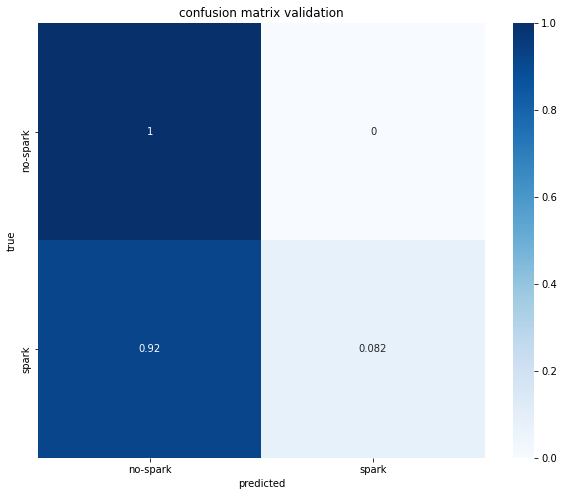

Classification report validation:
               precision    recall  f1-score   support

    no-spark       0.86      1.00      0.92       334
       spark       1.00      0.08      0.15        61

    accuracy                           0.86       395
   macro avg       0.93      0.54      0.54       395
weighted avg       0.88      0.86      0.80       395



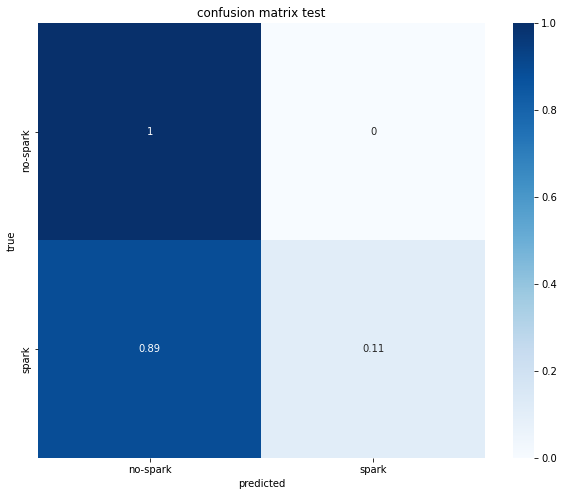

Classification report test:
               precision    recall  f1-score   support

    no-spark       0.87      1.00      0.93       421
       spark       1.00      0.11      0.20        72

    accuracy                           0.87       493
   macro avg       0.93      0.56      0.56       493
weighted avg       0.89      0.87      0.82       493



In [ ]:
confMatrix = confusion_matrix(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('confusion matrix validation')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print("Classification report validation:\n",  classification_report(Y_valid.argmax(axis=1), Y_valid_pred.argmax(axis=1), target_names=class_labels))

confMatrix = confusion_matrix(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), normalize='true')
plt.figure(figsize=(10,8))
sns.heatmap(confMatrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot=True)
plt.title('confusion matrix test')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
print("Classification report test:\n",  classification_report(Y_test.argmax(axis=1), Y_test_pred.argmax(axis=1), target_names=class_labels))

## inceptionv3_ep300_batch256_metric_09recall_01sigmoid_wrong_spark_sigmoid_loss

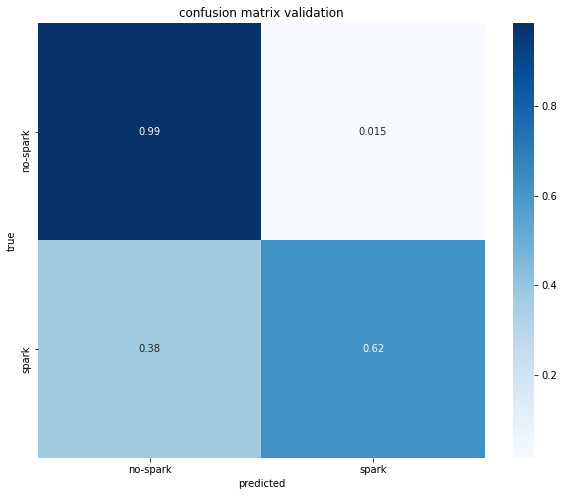

Classification report validation:
               precision    recall  f1-score   support

    no-spark       0.93      0.99      0.96       334
       spark       0.88      0.62      0.73        61

    accuracy                           0.93       395
   macro avg       0.91      0.80      0.84       395
weighted avg       0.93      0.93      0.92       395



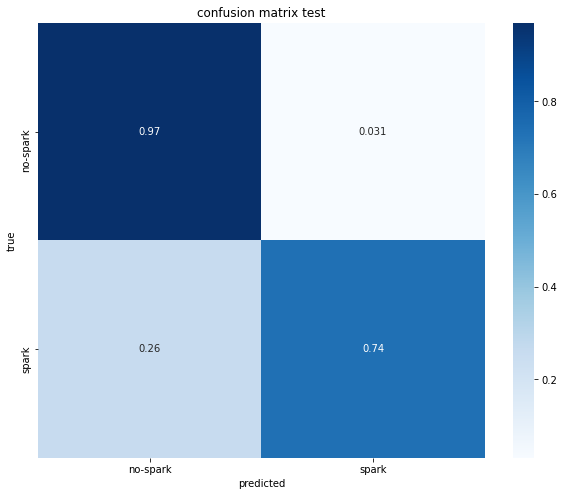

Classification report test:
               precision    recall  f1-score   support

    no-spark       0.96      0.97      0.96       421
       spark       0.80      0.74      0.77        72

    accuracy                           0.94       493
   macro avg       0.88      0.85      0.87       493
weighted avg       0.93      0.94      0.93       493



In [ ]:
trainID = 'inceptionv3_ep300_batch256_metric_09recall_01sigmoid_wrong_spark_sigmoid_loss'
Y_test_pred, Y_valid_pred = load_and_evaluate_model(trainID)

## Comparisons

In [8]:
modelsFolder = 'drive/MyDrive/tfm/DEEPCARDIO_drive/sparks/train/'
modelsIDs = sorted([mod[:-3] for mod in os.listdir(modelsFolder) if mod.endswith(".h5") and mod.startswith('inceptionv3')])
modelsIDs

['inceptionv3_100epochs',
 'inceptionv3_ep200_batch128__0.6recall_and_false_spark__sigmoid_loss',
 'inceptionv3_ep200_batch128_metric_09recall_01sigmoid',
 'inceptionv3_ep200_batch256_metric_09recall_01sigmoid',
 'inceptionv3_ep200_batch256_metric_09recall_01sigmoid_loss_tmpcustom',
 'inceptionv3_ep200_batch32_08metricSparkRecall02accuracy',
 'inceptionv3_ep200_batch32_accuracy',
 'inceptionv3_ep200_batch32_justMetricSparkRecall2',
 'inceptionv3_ep200_batch32_metricSparkRecall',
 'inceptionv3_ep200_batch32_metric_09sparkRecall01wrongSparkSigmoid',
 'inceptionv3_ep200_batch32_metric_accuracy',
 'inceptionv3_ep200_batch32_metric_sparkRecall_ifExistsElse_accuracy',
 'inceptionv3_ep200_batch64_metric_09recall_01sigmoid',
 'inceptionv3_ep300_batch128__0.6recall_and_false_spark__sigmoid_loss',
 'inceptionv3_ep300_batch256__0.6recall_and_false_spark__categorical_crossentropy__classWeights',
 'inceptionv3_ep300_batch256__0.6recall_and_false_spark__sigmoid_loss',
 'inceptionv3_ep300_batch256__0

In [ ]:
# modelsIDs = ['inceptionv3_ep300_batch256__0.8recall_and_false_spark__sigmoid_loss']

In [9]:
import pandas as pd
import time
from sklearn.metrics import balanced_accuracy_score, accuracy_score, recall_score

ts = time.time()

cols = ['id', 'val_accuracy', 'val_spark_recall', 'val_recall_avg', 'test_accuracy', 'test_spark_recall', 'test_recall_avg']
allMetrics = []

for trainID in modelsIDs:
  print(trainID)
  inceptionv3 = keras.applications.InceptionV3(include_top=True, weights=None, classes=2, input_shape=X_train[0].shape)
  inceptionv3.load_weights(f"drive/MyDrive/tfm/DEEPCARDIO_drive/sparks/train/{trainID}.h5")
  Y_test_pred = inceptionv3.predict(X_test)
  Y_valid_pred = inceptionv3.predict(X_valid)

  metrics = ()
  for y, ypred in [(Y_valid, Y_valid_pred), (Y_test, Y_test_pred)]:
    auxy = y.argmax(axis=1)
    auxypred = ypred.argmax(axis=-1)

    metrics += (accuracy_score(auxy, auxypred), recall_score(auxy, auxypred, pos_label=1), balanced_accuracy_score(auxy, auxypred))

  allMetrics.append((trainID,) + metrics)

metricsDF = pd.DataFrame(allMetrics, columns=cols)

print(f" Elapsed time: {time.time()-ts}")

inceptionv3_100epochs
inceptionv3_ep200_batch128__0.6recall_and_false_spark__sigmoid_loss
inceptionv3_ep200_batch128_metric_09recall_01sigmoid
inceptionv3_ep200_batch256_metric_09recall_01sigmoid
inceptionv3_ep200_batch256_metric_09recall_01sigmoid_loss_tmpcustom
inceptionv3_ep200_batch32_08metricSparkRecall02accuracy
inceptionv3_ep200_batch32_accuracy
inceptionv3_ep200_batch32_justMetricSparkRecall2
inceptionv3_ep200_batch32_metricSparkRecall
inceptionv3_ep200_batch32_metric_09sparkRecall01wrongSparkSigmoid
inceptionv3_ep200_batch32_metric_accuracy
inceptionv3_ep200_batch32_metric_sparkRecall_ifExistsElse_accuracy
inceptionv3_ep200_batch64_metric_09recall_01sigmoid
inceptionv3_ep300_batch128__0.6recall_and_false_spark__sigmoid_loss
inceptionv3_ep300_batch256__0.6recall_and_false_spark__categorical_crossentropy__classWeights
inceptionv3_ep300_batch256__0.6recall_and_false_spark__sigmoid_loss
inceptionv3_ep300_batch256__0.6recall_and_false_spark__sigmoid_loss__classWeights
inceptionv3_e

In [11]:
metricsDF.columns=['id', 'val_accuracy', 'val_spark_recall', 'val_recall_avg', 'test_accuracy', 'test_spark_recall', 'test_recall_avg']
metricsDF.to_csv('drive/MyDrive/tfm/DEEPCARDIO_drive/sparks/train/metrics.csv', sep=';', index=False)

## Mal classificats

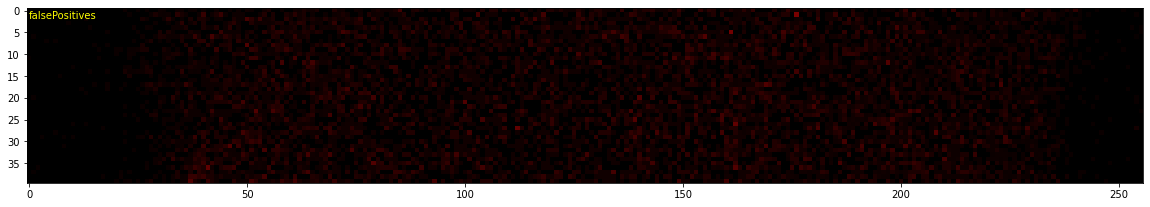

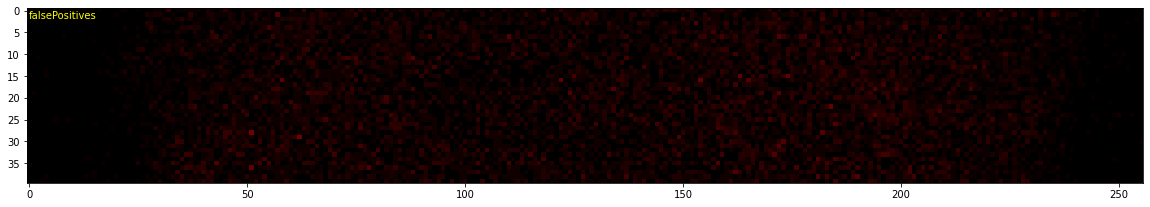

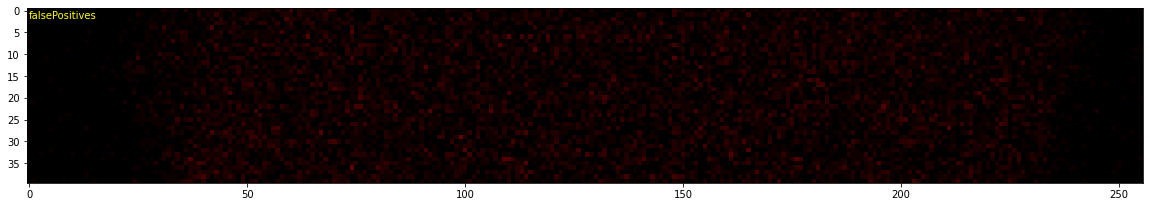

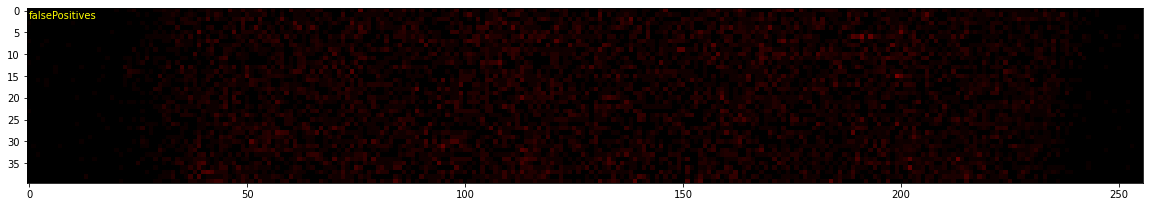

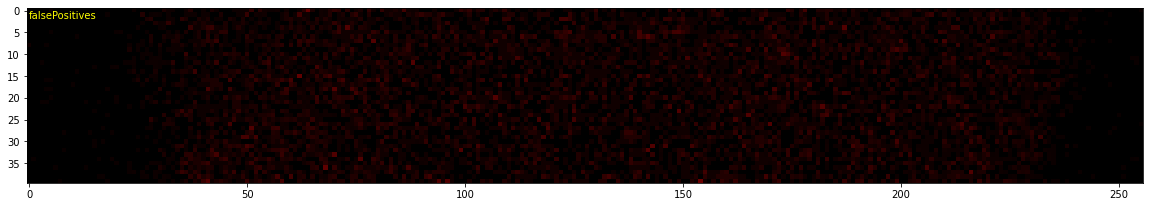

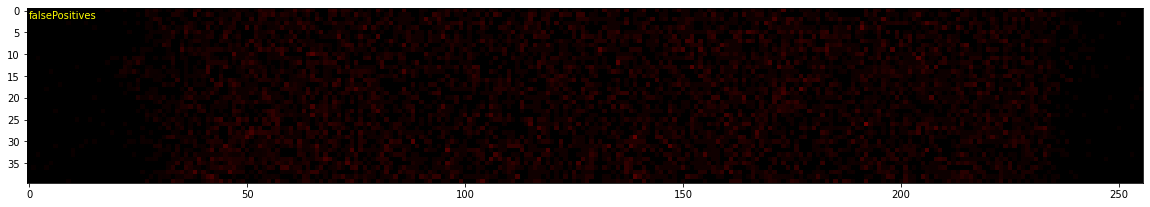

In [ ]:
falseNegatives = (Y_valid.argmax(axis=1)==1) & (Y_valid_pred.argmax(axis=1)!=1)
falsePositives = (Y_valid.argmax(axis=1)==0) & (Y_valid_pred.argmax(axis=1)==1)

plottedCount = 0
for i, isFN in enumerate(falseNegatives):
    if not isFN:
        continue
    plt.figure(figsize=(20,10))
    plt.imshow(cv2.cvtColor(X_valid[i][:40], cv2.COLOR_BGR2RGB))
    plt.show()
    plottedCount += 1
    if plottedCount > 5:
        break
plottedCount = 0
for i, isFN in enumerate(falsePositives):
    if not isFN:
        continue
    plt.figure(figsize=(20,10))
    plt.imshow(cv2.cvtColor(X_valid[i][:40], cv2.COLOR_BGR2RGB))
    plt.text(0, 0, 'falsePositives', c='yellow', verticalalignment='top')
    plt.show()
    plottedCount += 1
    if plottedCount > 5:
        break